# Gaussian Mixture Model

In [1]:
import numpy as np
import torch
from bxmodels.bayes import GMM, GMMConfig
from sklearn.mixture import GaussianMixture

import matplotlib.pyplot as plt

## Configuration

In [2]:
config = GMMConfig(
    num_components=5, num_features=2, covariance='spherical'
)
num_samples = 65536

## Reference GMM

In [3]:
gmm_reference = GMM(config)

In [4]:
_ = gmm_reference.component_weights.set_(torch.tensor(
    [0.1, 0.4, 0.15, 0.25, 0.1]
))

_ = gmm_reference.means.set_(torch.tensor([
    [-2, 1], [0, 1], [2, 1], [-6, -1], [6, -1]
], dtype=torch.float))

_ = gmm_reference.covs.set_(torch.tensor(
    [1, 0.25, 1, 1.5, 1.5]
))

### Generate from GMM

In [5]:
data, components = gmm_reference(num_samples, return_components=True)

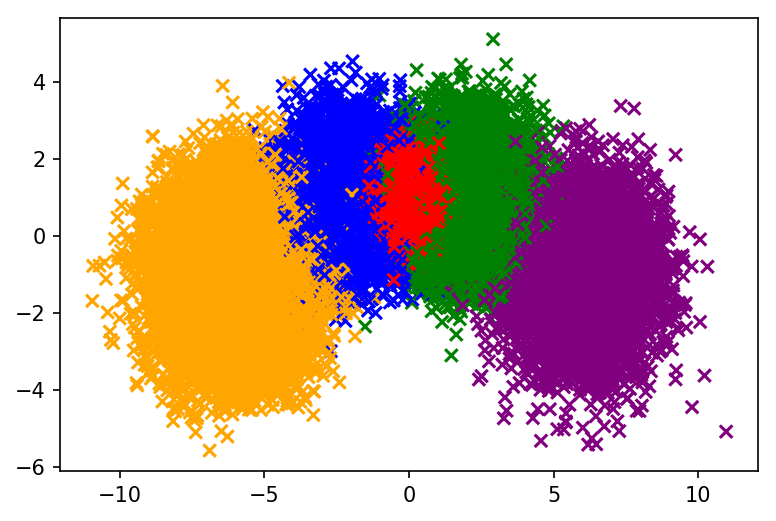

In [6]:
colors = np.array(['blue', 'red', 'green', 'orange', 'purple'])
plt.figure(dpi=150)
plt.scatter(*data.t(), marker='x', color=colors[components])
plt.show()

## Fit GMM

In [7]:
gmm = GMM(config)

In [8]:
gmm.reset_parameters(data)

In [9]:
history = gmm.fit(data, max_iter=100)

In [10]:
gmm.component_weights

Parameter containing:
tensor([0.4038, 0.2498, 0.0988, 0.1508, 0.0968])

In [11]:
gmm.means

Parameter containing:
tensor([[ 2.8446e-03,  1.0006e+00],
        [-6.0002e+00, -1.0009e+00],
        [ 6.0117e+00, -1.0105e+00],
        [ 1.9978e+00,  9.8885e-01],
        [-2.0616e+00,  9.9076e-01]])

In [12]:
gmm.covs

Parameter containing:
tensor([0.2541, 1.5076, 1.5075, 1.0078, 0.9789])

### Training Procedure

In [13]:
history.neg_log_likelihood

[tensor(3.7207),
 tensor(3.7114),
 tensor(3.7077),
 tensor(3.7056),
 tensor(3.7045),
 tensor(3.7039),
 tensor(3.7036),
 tensor(3.7034),
 tensor(3.7032),
 tensor(3.7032)]

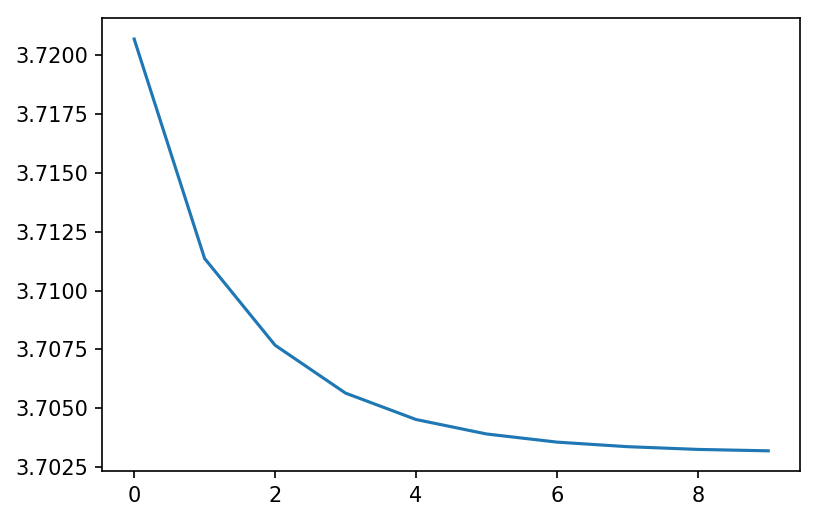

In [14]:
plt.figure(dpi=150)
plt.plot(range(len(history)), history.neg_log_likelihood)
plt.show()

## Comparison to Sklearn

In [15]:
estimator = GaussianMixture(n_components=5, covariance_type='spherical', init_params='kmeans', n_init=5)

In [16]:
estimator._initialize_parameters(data.numpy(), 1)

In [17]:
estimator.fit(data.numpy())

GaussianMixture(covariance_type='spherical', init_params='kmeans',
        max_iter=100, means_init=None, n_components=5, n_init=5,
        precisions_init=None, random_state=None, reg_covar=1e-06,
        tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
        weights_init=None)

In [18]:
estimator.means_

array([[-6.01028367e+00, -1.00692332e+00],
       [-2.13255976e+00,  9.80626460e-01],
       [ 6.01662644e+00, -1.01432131e+00],
       [ 2.04355107e+00,  9.87424988e-01],
       [ 3.42775294e-03,  1.00079994e+00]])

In [19]:
np.sqrt(estimator.covariances_)

array([1.22317795, 0.99302621, 1.22588998, 0.99850449, 0.51303936])

In [20]:
estimator.weights_

array([0.24861442, 0.09449361, 0.09855107, 0.14653022, 0.41181068])

In [21]:
estimator.lower_bound_

-3.703899041143475